# Fetal Health Data Project 

                                                                                    ----- Elise Kanber, 2023 ------

This project involves inspecting the fetal health dataset (https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification), exploring which features may be relevant for best detecting whether fetal health will be normal, suspect, or pathological. I compare three models for the classification of fetal health: 

- Random Forest
- KNN 
- SVM  


## Load libraries 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

## The dataset

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

* Normal
* Suspect
* Pathological

**Features**
- 'baseline value': FHR baseline (beats per minute)
- 'accelerations': Number of accelerations per second
- 'fetal_movement': Number of fetal movements per second
- 'uterine_contractions': Number of uterine contractions per second
- 'light_decelerations': Number of light decelerations per second
- 'severe_decelerations': Number of severe decelerations per second
- 'prolongued_decelerations': Number of prolonged decelerations per second
- 'abnormal_short_term_variability': Percentage of time with abnormal short term variability
- 'mean_value_of_short_term_variability': Mean value of short term variability
- 'percentage_of_time_with_abnormal_long_term_variability': Percentage of time with abnormal long term variability
- 'mean_value_of_long_term_variability': Mean value of long term variability
- 'histogram_width': Width of FHR histogram
- 'histogram_min': Minimum (low frequency) of FHR histogram
- 'histogram_max': Maximum (high frequency) of FHR histogram
- 'histogram_number_of_peaks': Number of histogram peaks
- 'histogram_number_of_zeroes': Number of histogram zeros
- 'histogram_mode': Histogram mode
- 'histogram_mean': Histogram mean
- 'histogram_median': Histogram median
- 'histogram_variance': Histogram variance
- 'histogram_tendency': Histogram tendency

**Target**

- 'fetal_health': Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [3]:
data = pd.read_csv("fetal_health.csv")

In [7]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [9]:
# missing values? 

missing_values = data.isnull().mean()
missing_values

print('There are no missing values in this dataset')

There are no missing values in this dataset


In [ ]:
# How many counts of each of the three fetal health classes - do we have an imbalanced dataset?  

In [12]:
data.groupby('fetal_health').count()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655,...,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655
2.0,295,295,295,295,295,295,295,295,295,295,...,295,295,295,295,295,295,295,295,295,295
3.0,176,176,176,176,176,176,176,176,176,176,...,176,176,176,176,176,176,176,176,176,176


<Axes: xlabel='fetal_health', ylabel='count'>

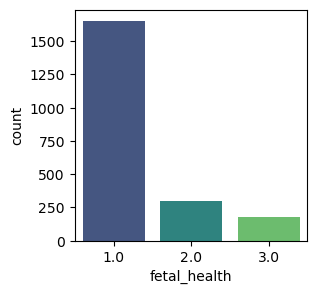

In [21]:
plt.figure(figsize=(3,3))
sns.countplot(data=data, x='fetal_health', palette='viridis')

There is a large imbalance in our dataset. The majority of cases belong to class 1 or 'Normal' fetal health, which is to be expected for this type of data. 

However, this often causes issues for classification, as the model decides that it can always predict class 1 and achieve high accuracy (as the majority of cases fall within this class), but this is misleading. This is known as the "accuracy paradox". 

Therefore, for this dataset, we shouldn't only look at classification accuracy. Some other metrics we might be able to use to help understand the accuracy of the model are: 

* Confusion Matrix: A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).
* Precision: A measure of a classifiers exactness.
* Recall: A measure of a classifiers completeness
* F1 Score (or F-score): A weighted average of precision and recall.

Can also look at using: 

* Cohen’s kappa: Classification accuracy normalized by the imbalance of the classes in the data.
* ROC Curves: Like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of these values.

(Information taken from: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) 


# Exploratory visualisations 

<Axes: >

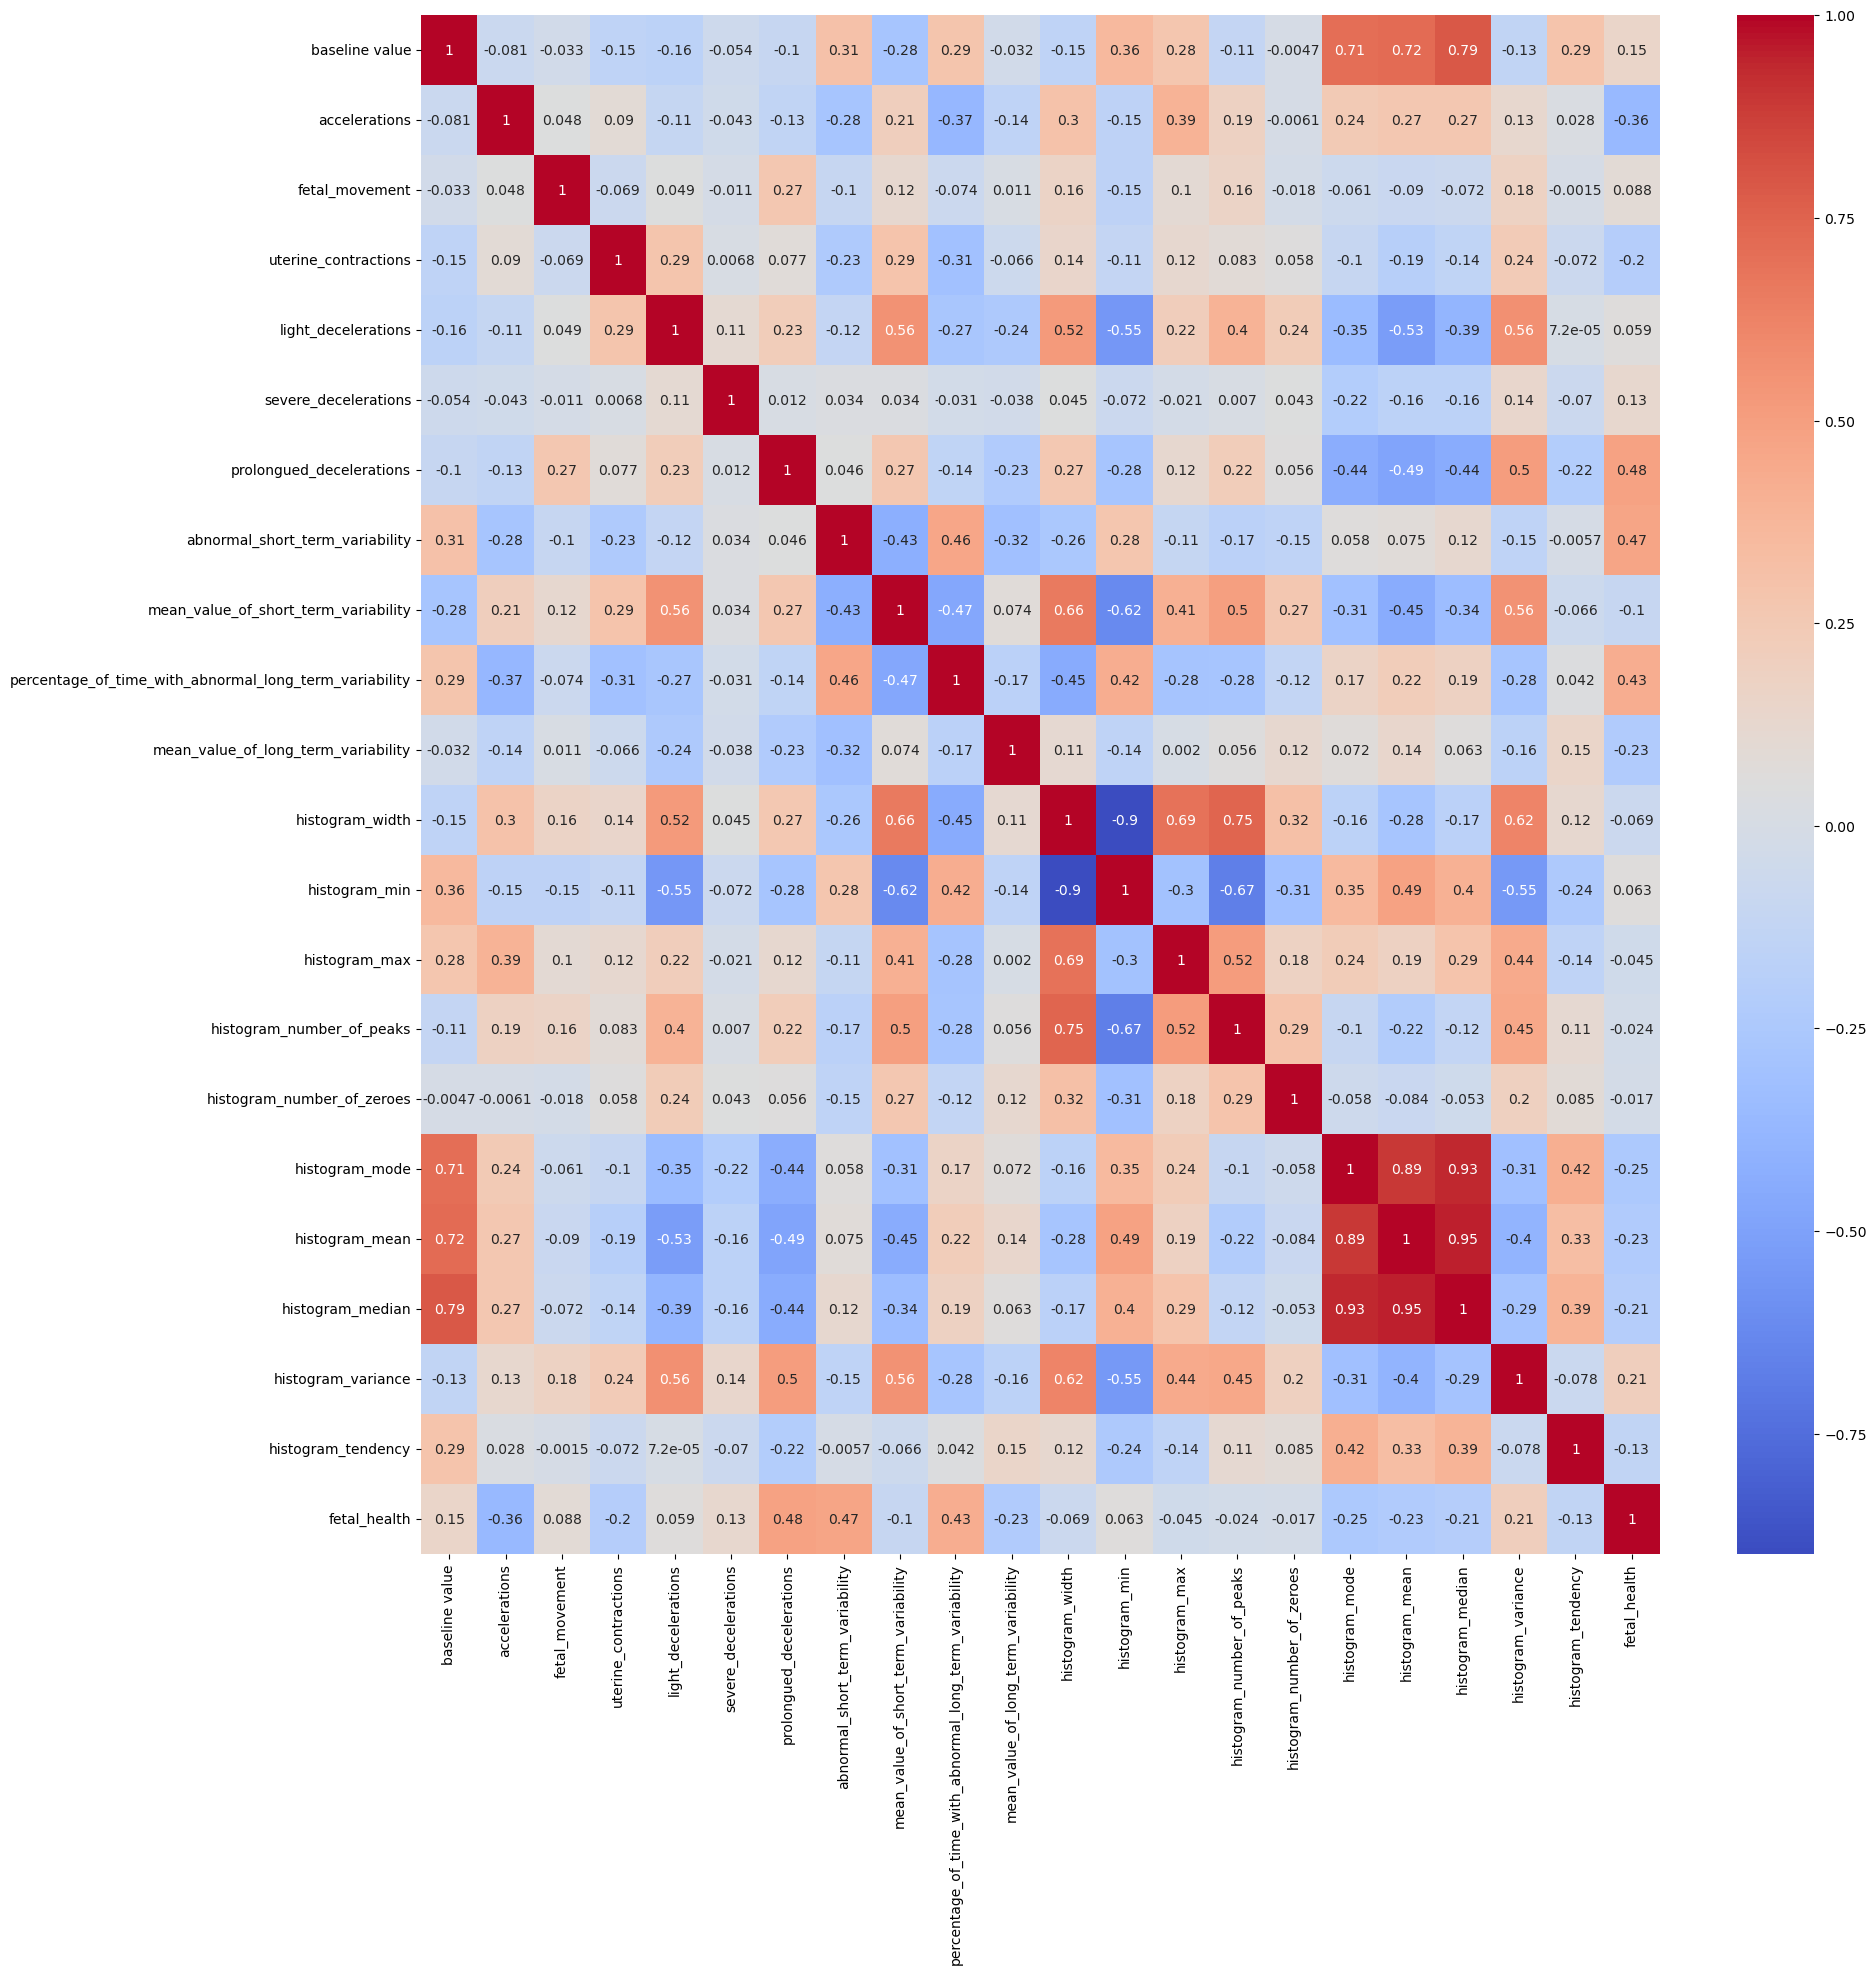

In [23]:
# Create a correlation matrix
plt.figure(figsize=(20,20))  
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [37]:
# Features with the highest correlations with fetal health: 
corr = data.corr()
(abs(corr["fetal_health"])).sort_values(ascending=False).head(6)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                             0.364066
histogram_mode                                            0.250412
Name: fetal_health, dtype: float64

We can see that the features most highly correlated with fetal health are:
- "prolongued_decelerations"
- "abnormal_short_term_variability"
- "percentage_of_time_with_abnormal_long_term_variability"
- "accelerations"
- "histogram_mode" 


### Preparing the data for classification 

We will implement three different classifiers: Random Forest, K Nearest Neighbours (KNN), and Support Vector Machine (SVM) to compare their ability to accurately classify fetal well-being. 

As one of these classifiers (KNN) uses distance-based measures, it is important that all of the features are on the same scale. 

Extra info: The KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, so the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than those on a small scale. 

Therefore, we need to standardise/normalise the features to be on the same scale. 

### Scaling the features

In [44]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(data.drop('fetal_health',axis=1))   # we want to fit the scaler to everything except the target class 
scaled_features = scaler.transform(data.drop('fetal_health',axis=1))  # now we tranform the features using the scaler.
data_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])  # now we create a dataframe so it's not just an array with no headings. Remember that the column names would be everything BUT the last column (fetal_health), so we can use slice notation to drop the last column name. 
data_feat.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


### Train Test Split 

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X = data_feat   # These are the scaled and centred features (remember we dropped the Target class column)
y = data['fetal_health']  # target class

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 101)

### K Nearest Neighbours 

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Finding a K value using the elbow method 

In [50]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

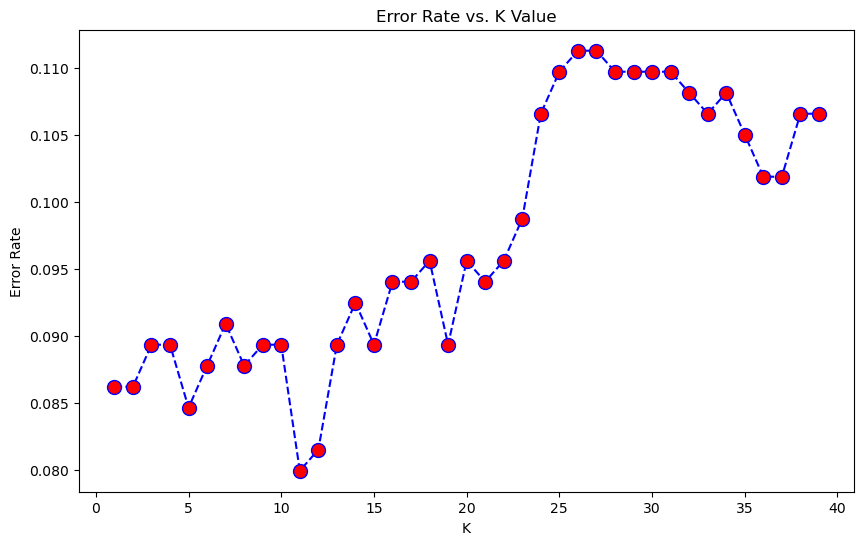

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see that the error rate is quite low when K is around 10-13, so I selected a K value of 11. 

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


KNN_cv_score = cross_val_score(knn, X_train,y_train, cv=10)
print("%s: %f " % ('KNN', KNN_cv_score.mean()))

WITH K=11


[[493   8   0]
 [ 33  53   0]
 [  5   5  41]]


              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       501
         2.0       0.80      0.62      0.70        86
         3.0       1.00      0.80      0.89        51

    accuracy                           0.92       638
   macro avg       0.91      0.80      0.85       638
weighted avg       0.92      0.92      0.92       638

KNN: 0.887121 


### Support Vector Machine

In [67]:
from sklearn.svm import SVC

In [69]:
svm = SVC()

In [70]:
svm.fit(X_train,y_train)

SVC()

In [71]:
predictions = svm.predict(X_test)

In [72]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
SVM_cv_score = cross_val_score(svm, X_train,y_train, cv=10)
print("%s: %f " % ('SVM', SVM_cv_score.mean()))

[[493   8   0]
 [ 34  52   0]
 [  4   5  42]]


              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       501
         2.0       0.80      0.60      0.69        86
         3.0       1.00      0.82      0.90        51

    accuracy                           0.92       638
   macro avg       0.91      0.80      0.85       638
weighted avg       0.92      0.92      0.92       638

SVM: 0.896545 


### Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
rfc_pred = rfc.predict(X_test)

In [76]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))
RFC_cv_score = cross_val_score(rfc, X_train,y_train, cv=10)
print("%s: %f " % ('RFC', RFC_cv_score.mean()))


[[498   3   0]
 [ 17  68   1]
 [  2   1  48]]


              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98       501
         2.0       0.94      0.79      0.86        86
         3.0       0.98      0.94      0.96        51

    accuracy                           0.96       638
   macro avg       0.96      0.91      0.93       638
weighted avg       0.96      0.96      0.96       638

RFC: 0.936155 


### Comparing the three classifiers: 

In [108]:
print("%s: %f " % ('KNN', KNN_cv_score.mean()))
print("%s: %f " % ('SVM', SVM_cv_score.mean()))
print("%s: %f " % ('RFC', RFC_cv_score.mean()))

print('We can see that the Random Forest Classifer was best at classifying the data.\n Decision trees often perform well on imbalanced datasets.')
print('The rfc already performs very well, but let''s see if we can improve it further using hyperparamter optimisation')

KNN: 0.887121 
SVM: 0.896545 
RFC: 0.936155 
We can see that the Random Forest Classifer was best at classifying the data.
 Decision trees often perform well on imbalanced datasets.
The rfc already performs very well, but lets see if we can improve it further using hyperparamter optimisation


### Now, we can use Grid Search to perform hyperparameter optimisation

Finding the right parameters to use is tricky. We can try a bunch of combinations and see what works best, and this is known as a GridSearch (creates a 'grid' of parameters and tries out all possible combinations). We can use Scikit-learn's built in GridSearchCV functionality. 

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. 

The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [104]:
# Dictionary of paramters 

param_grid = { 
    'n_estimators': [10, 100, 150, 500, 1000],
    'max_depth' : [4,6,8,10,12,14,16],
    'criterion' :['gini', 'entropy']
}

In [105]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'n_estimators': [10, 100, 150, 500, 1000]})

In [106]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 100}

In [107]:
grid_predictions = CV_rfc.predict(X_test)

print('*** Original Random Forest Results ***')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))
print('\n')
print('*** New Random Forest Results - after hyperparameter optimisation ***')
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))



*** Original Random Forest Results ***
[[498   3   0]
 [ 17  68   1]
 [  2   1  48]]


              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98       501
         2.0       0.94      0.79      0.86        86
         3.0       0.98      0.94      0.96        51

    accuracy                           0.96       638
   macro avg       0.96      0.91      0.93       638
weighted avg       0.96      0.96      0.96       638



*** New Random Forest Results - after hyperparameter optimisation ***
[[497   4   0]
 [ 18  67   1]
 [  3   2  46]]
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98       501
         2.0       0.92      0.78      0.84        86
         3.0       0.98      0.90      0.94        51

    accuracy                           0.96       638
   macro avg       0.95      0.89      0.92       638
weighted avg       0.96      0.96      0.95       638

